# IRIS FLOWER **CLASSIFICATION**
Data source : Iris Data Set - UCI Machine Learning Repository

This Project can be done using following classification methods:


1.   LogisticRegression




# **Importing all library**


In [31]:
import pandas as pd
import numpy as np

In [32]:
import matplotlib.pyplot as plt

### Upload File from local device in COLAB

In [33]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris (1).csv


In [34]:
import io
iris = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
iris.describe()

,Id,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [35]:
iris.head()

,Id,sepal.length,sepal.width,petal.length,petal.width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
iris.tail()

,Id,sepal.length,sepal.width,petal.length,petal.width,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [37]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [38]:
import seaborn as sns

# **Visualization of Iris Dataset**

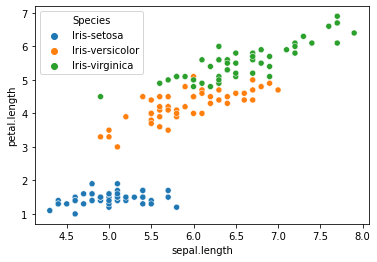

In [39]:
sns.scatterplot(x='sepal.length',y='petal.length',data=iris,hue='Species')
plt.show()

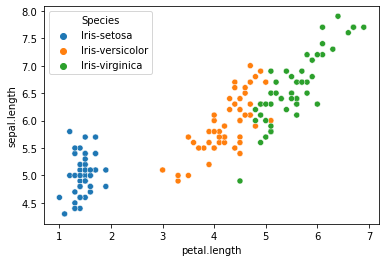

In [40]:
sns.scatterplot(y='sepal.length',x='petal.length',data=iris,hue='Species')
plt.show()

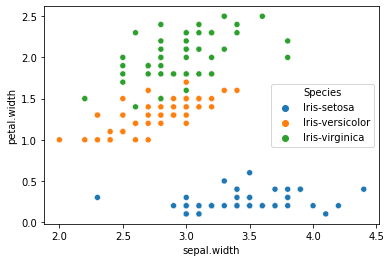

In [41]:
sns.scatterplot(x='sepal.width',y='petal.width',data=iris,hue='Species')
plt.show()

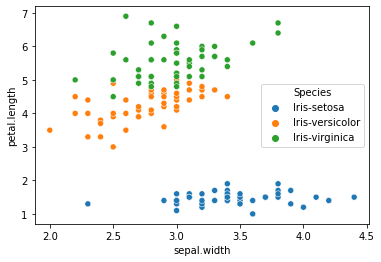

In [42]:
sns.scatterplot(y='petal.length',x='sepal.width',data=iris,hue='Species')
plt.show()

# **Showing the relation between features in Iris dataset Using Correlation**

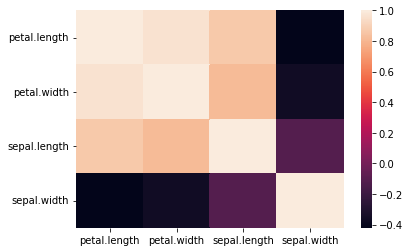

In [43]:
df=iris[['petal.length','petal.width','sepal.length','sepal.width']]
df.corr()
sns.heatmap(df.corr())

In [44]:
mapping={'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2}
iris['Species']=iris['Species'].map(mapping)

In [45]:
iris.head()

,Id,sepal.length,sepal.width,petal.length,petal.width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# **Splitting the training and testing in dataset**

In [46]:
from sklearn.model_selection import train_test_split

In [47]:

x=iris[['sepal.length','sepal.width','petal.length','petal.width']].values
y=iris[['Species']].values


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


# **Implementaion LogisticRegration Algorithm**

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr=LogisticRegression()

In [51]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [52]:
y_pred=lr.predict(x_test)
len(y_pred)

45

In [53]:
y_pred


array([2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0,
       2])

# **Accuracy of Model**

In [63]:
print("The Accuracy:",lr.score(x_test,y_test)*100,"%")

The Accuracy: 97.77777777777777 %


In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mean_squared_error(y_test,y_pred)

0.022222222222222223

# **Showing actual accuracy of my model using Confusion Matrix**

In [57]:
from sklearn import metrics

In [58]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [59]:
print(metrics.confusion_matrix(y_test,y_pred))


[[15  0  0]
 [ 0 12  0]
 [ 0  1 17]]


This showing that:
15 for class setosa,
12 for class versicolor and  18 for class virginica. Our model predict 100 % for class ***setosa*** , 100% predict for class ***versicolor*** and out of 18 ,17 predict verginica and 1 predict versicolor. So our model doesn't predict 100% for class verginica.
